In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [36]:
df = pd.read_csv('dataset.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For analysis, Name, Ticket and Cabin seem irrelevant.

In [3]:
df1 = df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1)

In [4]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dummy = pd.get_dummies(df['Sex'], drop_first = True)
df1 = df1.drop(['Sex'], axis = 1 )
df1 = pd.concat([df1, dummy], axis = 1)


In [6]:
dummy1 = pd.get_dummies(df['Embarked'], drop_first = True)
df1 = df1.drop(['Embarked'], axis = 1 )
df1 = pd.concat([df1, dummy1], axis = 1)


In [7]:
#df1.describe()

In [8]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df1 = df1.rename(columns = {'male': 'Gender'})

In [9]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [10]:
#sns.pairplot(df1)

In [11]:
#df1.corr()
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Parch does not have great correlation and also has evidence of multicollinearity. Parch to be dropped.


In [12]:
df1 = df1.drop('Parch', axis=1)

In [13]:
#sns.pairplot(df1)

## Logistic Regression


In [14]:
ar = df1.values
x = ar[: , 1:11]
y = ar[: , 0]

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
x_standard = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_standard , y , test_size = 0.2, random_state = 42)




In [16]:
model = LogisticRegression()


model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[88, 17],
       [19, 55]], dtype=int64)

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.7988826815642458

In [20]:
error = []

for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    Y_predict = neigh.predict(x_test)
    error.append(np.mean(Y_predict != y_test))
    

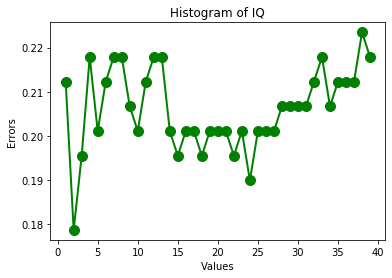

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(1,40) , error , color = 'green', marker = 'o' , linestyle = '-' , linewidth = 2, markersize = 10,)
plt.title('Histogram of IQ')
plt.xlabel("Values")
plt.ylabel("Errors")
plt.show()


In [22]:
from sklearn.metrics import classification_report , confusion_matrix
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)
Y_predict = neigh.predict(x_test)
print(confusion_matrix(y_test, Y_predict))
print(classification_report(y_test, Y_predict))

[[98  7]
 [25 49]]
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       105
         1.0       0.88      0.66      0.75        74

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



In [23]:
test = pd.read_csv('test.csv')
ID = test['PassengerId']

In [24]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test = test.drop(['Parch', 'Name', 'PassengerId', 'Cabin', 'Ticket'], axis = 1)

In [28]:
d1 = pd.get_dummies(test['Sex'], drop_first = True)
test = test.drop(['Sex'], axis = 1)
test = pd.concat([test,d1], axis = 1)
test = test.rename(columns = {'male': 'Gender'})
test.head()

,Pclass,Age,SibSp,Fare,Embarked,Gender
0,3,34.5,0,7.8292,Q,1
1,3,47.0,1,7.0000,S,0
2,2,62.0,0,9.6875,Q,1
3,3,27.0,0,8.6625,S,1
4,3,22.0,1,12.2875,S,0


In [29]:
d2 = pd.get_dummies(test['Embarked'], drop_first = True)
test = test.drop(['Embarked'], axis = 1)
test = pd.concat([test,d2], axis = 1)

In [30]:
test.head()

,Pclass,Age,SibSp,Fare,Gender,Q,S
0,3,34.5,0,7.8292,1,1,0
1,3,47.0,1,7.0000,0,0,1
2,2,62.0,0,9.6875,1,1,0
3,3,27.0,0,8.6625,1,0,1
4,3,22.0,1,12.2875,0,0,1


In [31]:
from sklearn import preprocessing
test['Age'] = preprocessing.scale(test['Age'])

In [32]:
test.describe()

,Pclass,Age,SibSp,Fare,Gender,Q,S
count,418.000000,4.180000e+02,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,8.698518e-17,0.447368,35.576535,0.636364,0.110048,0.645933
std,0.841838,1.001198e+00,0.896760,55.850103,0.481622,0.313324,0.478803
min,1.000000,-2.319355e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-5.200968e-01,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,-2.048523e-01,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,4.847449e-01,1.000000,31.471875,1.000000,0.000000,1.000000
max,3.000000,3.656893e+00,8.000000,512.329200,1.000000,1.000000,1.000000


In [33]:
prediction = neigh.predict(test)
prediction = prediction.astype(np.int)
prediction = prediction.reshape(-1,1)

In [34]:
ID = ID.values
ID = ID.astype(np.int)
ID = ID.reshape(-1,1)

In [35]:
submit = np.concatenate((ID, prediction) , axis = 1)
submit_df = pd.DataFrame(data=submit, columns = ['PassengerID', 'Survived'])

In [46]:
submit_df.head()

,PassengerID,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,1


In [48]:
submit_df.to_csv(r'C:\Users\ASUS\Desktop\Divij\Python\submit.csv', index=False, header=True)